牛顿迭代法与中值定理
===

# 1.牛顿迭代法
> 求解$x^2=5$

为了更加抽象，我们可以将原等式变为$f(x)=x^2-5$的样子，我们的目标就是找到使得$f(x)=0$的$x$的解。先来画图像

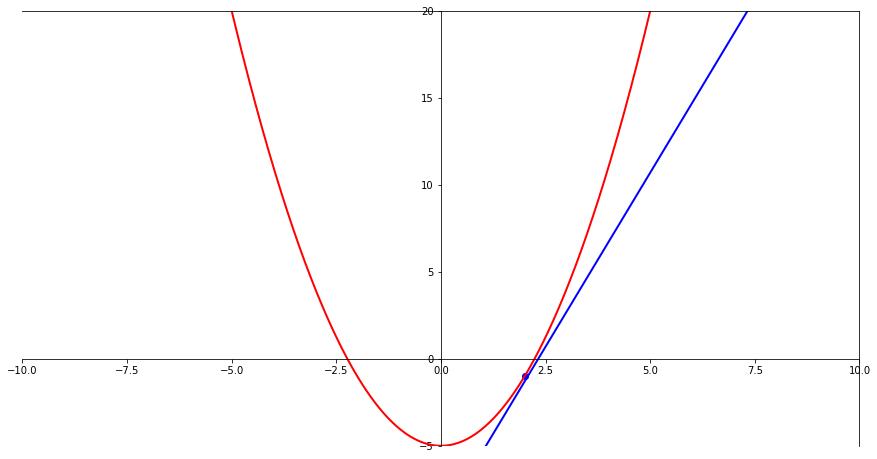

In [18]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(15,8), facecolor='w')
x = np.linspace(-10, 10, 1000)
y = x**2-5

plt.plot(x, y, color="r", linewidth=2)

# x1 = np.linspace(30, 80, 1000)
y1 = 4 * x - 9.3
plt.plot(x, y1, color='b',linewidth=2)

plt.scatter(2, -1, color='b')
# plt.scatter(30, -30, color='b')
# plt.scatter(80, 70, color='b')

# plt.text(0, 0, "P",fontsize=20)
# plt.text(30, -30, "T",fontsize=20)
# plt.text(80, 70, "Q",fontsize=20)
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data',0))
plt.xlim(-10,10)
plt.ylim(-5,20)
plt.show()

1. 首先假设$x_0=2$,那么有$(2,-1)$经过曲线，在这一点处我们可以画出一条曲线的切线。与$x$轴相交于$x_1$点。
2. $x_1$就是我们的第二个猜想，$x_1$比$x_0$更靠近结果。然后不停的重复，就会不断的接近目标
3. 经过$x_0,y_0$处的切线方程为$y-y_0=m(x-x_0)$，那么$x1$就是这条切线在$x$轴上的截距，所以就有
$$\begin{split}
0-y_0&=m(x_1-x_0) \\\\
&\Rightarrow x_1=x_0-\frac{y_0}{m} \\\\
&\Rightarrow x_1=x_0-\frac{f(x_0)}{f'(x_0)}
\end{split}$$
这个公式不停的迭代，可以求解任何方程的根，我们可以得到更加通用的公式如下
$$
x_{n+1}=x_{n}-\frac{f(x_n)}{f'(x_n)}
$$

我们知道原始方程的解是$\sqrt{5} \approx 2.2360679$，我们来用牛顿迭代法看看最后的结果能有多么的吻合。
1. $x_0=2$，有$f(x_0)=2^2-5=-1$，那么$f'(x_0)=2 \times x_0 = 4$
2. $x_1=x_0-\frac{f(x_0)}{f'(x_0)}=2-\frac{-1}{4}=2+\frac{1}{4}=2.25$
3. $x_2=x_1-\frac{f(x_1)}{f'(x_1)}=2.25-\frac{2.25^2-5}{2 * 2.25}=2.25-\frac{0.0625}{4.5} \approx 2.2361111$

我们可以看到迭代3步，两个结果就已经非常接近了

| n | $\sqrt{5}-x_n$ |
| - | -------------- |
| 0 | $2 \times 10^{-1}$ |
| 1 | $10^{-2}$ |
| 2 | $4 \times 10^{-5}$ |
| 3 | $4 \times 10^{-10}$ |

## 1.2.牛顿迭代法的误差分析

我们假设第n步迭代的误差为$E_n$，那么就有$E_n=|x-x_n|$。对于每一步迭代来说，都有$E_n \approx E_{n-1}^2$，也就是说，每迭代一步，精度都会提高一倍。就减小误差的速率来说，牛顿迭代法是很好的。

## 1.3.牛顿法的适用条件和不适用条件

牛顿迭代法的两个条件是
> 1. $|f'(x)|$不能太小， $|f''(x)|$不能太大
> 2. $x_0$的选取要在$x$的附近选择

# 2.中值定理
$$
\frac{f(b)-f(a)}{b-a}=f'(c)
$$
对于某些$c$成立，其中$a < c < b$，中值定理的前提条件是$f$在区间$(a,b)$内可微,并且在$[a,b]$上连续.从几何角度来说，就是在曲线上有两点$A,B$，坐标分别是$[a,f(a)],[b,f(b)]$。那么在$(a,b)$之间，总能找到一个点的横坐标为$c$，使得经过这个点的切线的斜率与$A,B$两点之间的割线的斜率相等。

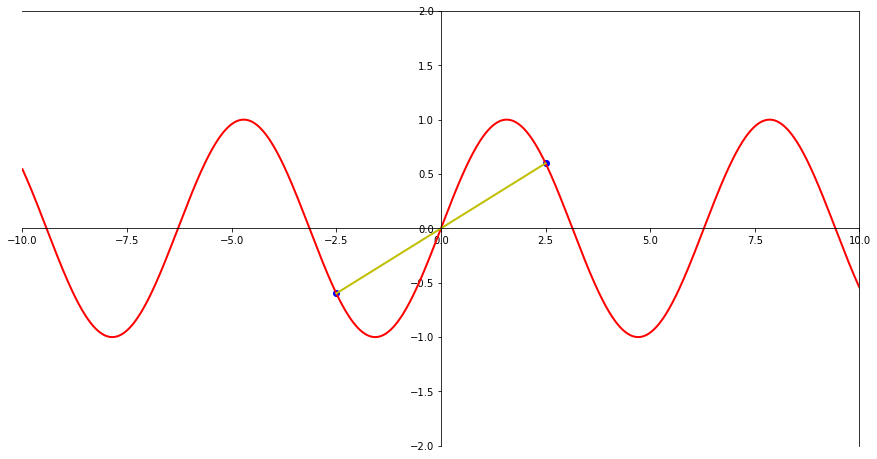

In [25]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(15,8), facecolor='w')
x = np.linspace(-10, 10, 1000)
y = np.sin(x)
plt.plot(x, y, color="r", linewidth=2)

x1 = [-2.5, 2.5]
y1 = np.sin(x1)
plt.scatter(x1, y1, color="b")
plt.plot(x1, y1, color="y", linewidth=2)

ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data',0))
plt.xlim(-10,10)
plt.ylim(-2,2)
plt.show()

其实也很好理解，比如上图，在两点之间有一条割线，那么我们可以在远处画一条这个割线的平行线，不断的向割线平移，总会跟曲线相切，这个切点c必然在$a,b$之间